In [1]:
# import dependancies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# read in CSV
sales_data = pd.read_csv("../data/merged_games_df.csv")
sales_data.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Console,Game Title,Price,Mean,Median
0,ADVENTURES OF TRON,2600,1981,Action,Mattel Interactive,630000.0,30000.0,NaN,10000.0,670000,2600,ADVENTURES OF TRON,16.10,False,False
1,AIRLOCK,2600,1981,Action,Data Age,360000.0,20000.0,NaN,NaN,390000,2600,AIRLOCK,17.00,False,False
2,ALIEN,2600,1981,Action,20th Century Fox Video Games,740000.0,40000.0,NaN,10000.0,790000,2600,ALIEN,61.24,True,True
3,ARMOR AMBUSH,2600,1981,Action,Mattel Interactive,150000.0,10000.0,NaN,NaN,170000,2600,ARMOR AMBUSH,9.92,False,False
4,ASTEROIDS,2600,1980,Shooter,Atari,4000000.0,260000.0,NaN,50000.0,4310000,2600,ASTEROIDS,14.06,False,False


In [3]:
# replace NS with 0 and view data info
sales_df = sales_data.fillna(0)
sales_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1283 entries, 0 to 1282
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          1283 non-null   object 
 1   Platform      1283 non-null   object 
 2   Year          1283 non-null   int64  
 3   Genre         1283 non-null   object 
 4   Publisher     1283 non-null   object 
 5   NA_Sales      1283 non-null   float64
 6   EU_Sales      1283 non-null   float64
 7   JP_Sales      1283 non-null   float64
 8   Other_Sales   1283 non-null   float64
 9   Global_Sales  1283 non-null   int64  
 10  Console       1283 non-null   object 
 11  Game Title    1283 non-null   object 
 12  Price         1283 non-null   float64
 13  Mean          1283 non-null   bool   
 14  Median        1283 non-null   bool   
dtypes: bool(2), float64(5), int64(2), object(6)
memory usage: 132.9+ KB


In [4]:
# Use .describe for statistical data
sales_df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Price
count,1283.000000,1.283000e+03,1.283000e+03,1.283000e+03,1.283000e+03,1.283000e+03,1283.000000
mean,1996.144973,4.949883e+05,1.972486e+05,1.450195e+05,3.302416e+04,8.705144e+05,31.979018
std,4.840275,1.333183e+06,3.937541e+05,4.419527e+05,7.684834e+04,1.930835e+06,29.505511
min,1980.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+04,1.410000
25%,1996.000000,6.000000e+04,2.000000e+04,0.000000e+00,0.000000e+00,1.300000e+05,10.020000
50%,1998.000000,1.800000e+05,7.000000e+04,0.000000e+00,1.000000e+04,3.400000e+05,20.610000
75%,1999.000000,4.800000e+05,1.900000e+05,5.500000e+04,4.000000e+04,9.200000e+05,45.220000
max,2003.000000,2.908000e+07,3.870000e+06,6.810000e+06,1.510000e+06,4.024000e+07,139.500000


In [5]:
# create genre table to genre visuals
genres =sales_df.groupby("Genre", as_index=False).count()
genre_count = genres[["Genre", "Name"]].rename(columns={"Name": "Game Count"})
sorted_genre_count = genre_count.sort_values(by=["Game Count"], ascending=False)
sorted_genre_count

,Genre,Game Count
10,Sports,246
0,Action,200
6,Racing,183
8,Shooter,132
2,Fighting,124
4,Platform,107
7,Role-Playing,62
5,Puzzle,51
3,Misc,49
9,Simulation,49


In [6]:
palette = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#ff8001', '#00fcfe', '#FE00FA', '#16FF32', '#FF97FF', 
           '#FFFF00','#2dc997','#B10DA1']

In [21]:
# Bar Graph of top Genres
fig = px.bar(sorted_genre_count, title="Top Game Genres - vintage games", x="Genre", y="Game Count")
fig.show()
fig.write_html("../static/img/vintagegenres.html")

In [8]:
# create genre by year table for viz
genre_year = sales_df.groupby(["Genre", "Year"], as_index=False).count()
genre_by_year = genre_year[["Genre", "Year", "Platform"]].rename(columns={"Platform": "Games per Genre"})
genre_by_year

,Genre,Year,Games per Genre
0,Action,1981,20
1,Action,1982,10
2,Action,1983,5
3,Action,1984,1
4,Action,1985,1
...,...,...,...
178,Strategy,1997,5
179,Strategy,1998,10
180,Strategy,1999,13
181,Strategy,2000,1


In [9]:
# stacked bar graph of genre by year
fig = px.bar(genre_by_year, title="Top Genres by Year", x="Year", y="Games per Genre", 
             color="Genre", range_y=[0,250], color_discrete_sequence=palette)
fig.show()

In [10]:
genre_year =sales_df.groupby(["Genre","Year"]).agg({"Platform":"count"}).reset_index()
# genre_year
genre_by_year = genre_year[["Genre", "Year", "Platform"]].rename(columns={"Platform": "Games per Genre"})
# genre_by_year
# data_gp.rename(columns={"Country":"Total_Launch"},inplace=True)#2
idx = pd.MultiIndex.from_product([genre_by_year.Year.unique(), 
                                  genre_by_year.Genre.unique()], names=['Year', 'Genre'])
genre_by_year2 = genre_by_year.set_index(['Year', 'Genre']).reindex(idx).fillna(0).sort_values(ascending=True,by=["Genre","Year"])
cumulative_genre_by_year = pd.concat([genre_by_year2, genre_by_year2.groupby(level=1).cumsum().add_prefix('Cumulative_')], 1).sort_index(level=1).reset_index()
cumulative_genre_by_year.sort_values(by=["Year","Genre"],inplace=True)
# dat2.rename(columns={"Launch_Year":"Year","Cum_Total_Launch":"Cumulative_Launches","Sat_country":"Country","Cum_Success":"Cumulative_Successes"},inplace=True) #7
cumulative_genre_by_year

,Year,Genre,Games per Genre,Cumulative_Games per Genre
0,1980,Action,0.0,0.0
24,1980,Adventure,0.0,0.0
48,1980,Fighting,1.0,1.0
72,1980,Misc,2.0,2.0
96,1980,Platform,0.0,0.0
...,...,...,...,...
191,2003,Role-Playing,0.0,62.0
215,2003,Shooter,0.0,132.0
239,2003,Simulation,0.0,49.0
263,2003,Sports,1.0,246.0


In [11]:
# top genre over time bar chart race
fig = px.bar(cumulative_genre_by_year, title="Top Genres over Time-vintage", x="Genre", y="Cumulative_Games per Genre", 
             color="Genre", animation_frame="Year", animation_group="Genre", range_y=[0,260],
             color_discrete_sequence=palette)
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 300

fig.show()

In [12]:
# Create Sales info table for viz
sales_year = sales_df.groupby(["Year"], as_index=False).sum()
sales_by_year = sales_year[["Year","NA_Sales","EU_Sales", "JP_Sales", "Other_Sales","Global_Sales"]]
sales_by_year

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1980,6500000.0,420000.0,0.0,80000.0,6990000
1,1981,25190000.0,1470000.0,0.0,230000.0,26970000
2,1982,15650000.0,960000.0,0.0,180000.0,16760000
3,1983,5840000.0,510000.0,2800000.0,100000.0,9230000
4,1984,32410000.0,1860000.0,8210000.0,650000.0,43140000
5,1985,33730000.0,4710000.0,13080000.0,910000.0,52430000
6,1986,8070000.0,1850000.0,7180000.0,1780000.0,18860000
7,1987,7749999.0,1300000.0,6830000.0,190000.0,16110000
8,1988,21920000.0,6190000.0,8130000.0,940000.0,37190000
9,1989,3890000.0,460000.0,310000.0,50000.0,4700000


In [14]:
# global sales by year - export to HTML
fig = px.line(sales_by_year, title="Global Sales - 1980-2003", x="Year", y="Global_Sales")
fig.show()
fig.write_html("../static/img/vintageglobalsales.html")

<AxesSubplot:xlabel='Year'>

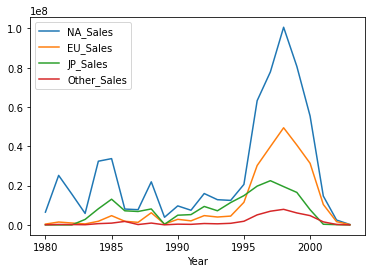

In [15]:
# comparison of sales by country by year
sales_by_year.plot(x="Year", y=["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"], kind="line")

In [16]:
platform_and_year = sales_df.groupby(["Platform","Year"], as_index=False).count()
games_by_year = platform_and_year[["Platform", "Year", "Name"]].rename(columns={"Name": "Games per Platform"})
games_by_year.tail()

,Platform,Year,Games per Platform
50,SNES,1992,8
51,SNES,1993,10
52,SNES,1994,10
53,SNES,1995,6
54,SNES,1996,1


In [17]:
# games by platform by year - export to HTML
fig = px.bar(games_by_year, title="Top Platforms by Year", x="Year", y="Games per Platform", 
             color="Platform", range_y=[0,250], color_discrete_sequence=palette)
fig.show()
fig.write_html("../static/img/vintageplatforms.html")

In [18]:
fig = px.scatter(games_by_year, x="Year", y="Games per Platform",
                size="Games per Platform", color="Year", facet_col="Platform")
fig.show()

In [19]:
fig = px.scatter(genre_by_year, x="Genre", y="Games per Genre",
                size="Games per Genre", color="Year")
fig.show()